## Capítulo 1
### Seção 1.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# função de max likelihood, como definida no livro
# retorna um dicionário
def max_likelihood(n_observations, p: list, q: list):
    W = len(p)
    relative_entropy = 0
    for index in range(0, W):
        relative_entropy += p[index] * np.log(p[index]/q[index])
    probability = np.exp(n_observations*relative_entropy)

    return {'Relative-Entropy': relative_entropy, 'Probability' : probability}




Segundo o livro, na prática não sabemos as probabilidades $p_i$, então um modelo de machine learning serviria para encontrar as probabilidades $q_i$ de forma iterativa, de modo que o erro (ou, nesse caso, a entropia relativa) seja minimizado.

Fazemos um teste simples para verificar como os valores da entropia relativa mudam conforme o nosso 'chute' de $q_i$. Para isso, geramos 100 valores de acordo com a distribuiçao normal e comparamos com 100 valores com erro aleatório.


In [2]:
erro = 0.01
probability_exact = [np.random.uniform(0, 0.2) for x in range(0, 10)]
probability_guesses = [x + erro*np.random.uniform(0, 1) for x in probability_exact if x + erro*np.random.uniform(0, 0.2) < 1]

print('Entropia relativa: ', max_likelihood(10000, probability_exact, probability_guesses)['Relative-Entropy'])

Entropia relativa:  -0.046420619644703294


In [5]:
def plot_rel_entropy_probability(max_error, probability_exact = probability_exact):
    erro_plot = np.linspace(0, max_error, 1000)
    plt.scatter(erro_plot, max_likelihood(10000, probability_exact, 
                                  [x + erro_plot*np.random.uniform(0, 1) for x in probability_exact])['Relative-Entropy'])
    plt.xlabel('Erro')
    plt.ylabel('Entropia relativa')
    plt.show()
    
    plt.xlabel('Erro')
    plt.ylabel('Probabilidade')
    plt.scatter(erro_plot, max_likelihood(10000, probability_exact, 
                                  [x + erro_plot*np.random.uniform(0, 1) for x in probability_exact])['Probability'], color = 'red')
    plt.show()
    
    

Com a função definida acima, podemos plotar gráficos para a entropia relativa e para a probabilidade, onde a probabilidade nos diz quão provável é estarmos próximos ao valor verdadeiro da probabilidade.

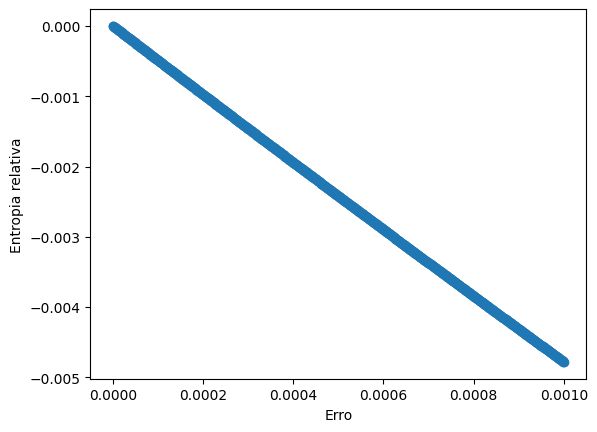

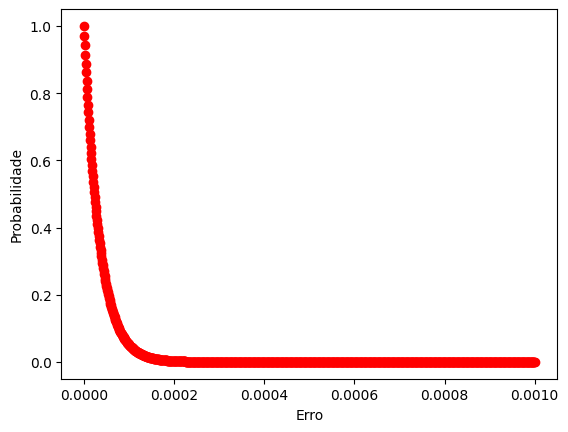

In [8]:
# O único argumento da função é o erro máximo desejado, ou seja, o limite superior do eixo x.
# Pode-se mudar o erro para brincar com os gráficos
plot_rel_entropy_probability(0.001)